In [1]:
!pip install keras-tuner

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 818.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ---------------------------------------- 129.1/129.1 kB ? eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 70.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/127.5 kB ? eta -:--:--
   ---------------------------------------- 127.5/127.5 kB ? eta 0:00:00
   ---------------------------------------- 0.0/267.2 kB ? eta -:--:--
   --------------------------------------- 267.2/267.2 kB 16.1 MB/s eta 0:00:00


In [2]:
!pip install tensorflow

   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 1.0/385.2 MB 20.3 MB/s eta 0:00:19
   ---------------------------------------- 3.9/385.2 MB 50.0 MB/s eta 0:00:08
    --------------------------------------- 6.9/385.2 MB 54.7 MB/s eta 0:00:07
    --------------------------------------- 9.3/385.2 MB 54.1 MB/s eta 0:00:07
   - -------------------------------------- 12.2/385.2 MB 65.6 MB/s eta 0:00:06
   - -------------------------------------- 15.3/385.2 MB 65.6 MB/s eta 0:00:06
   - -------------------------------------- 18.1/385.2 MB 65.6 MB/s eta 0:00:06
   -- ------------------------------------- 21.1/385.2 MB 65.6 MB/s eta 0:00:06
   -- ------------------------------------- 23.4/385.2 MB 59.5 MB/s eta 0:00:07
   -- ------------------------------------- 25.9/385.2 MB 59.5 MB/s eta 0:00:07
   -- ------------------------------------- 28.8/385.2 MB 65.6 MB/s eta 0:00:06
   --- ------------------------------------ 31.7/385.

In [3]:
!pip install blp

In [3]:
!pip install --index-url=https://bcms.bloomberg.com/pip/simple blpapi
#conda install -c conda-forge blpapi

Looking in indexes: https://bcms.bloomberg.com/pip/simple


ERROR: Could not find a version that satisfies the requirement blpapi (from versions: none)
ERROR: No matching distribution found for blpapi


In [8]:
pip install xbbg
#!pip install blpapi

ERROR: Could not find a version that satisfies the requirement blpapi (from versions: none)
ERROR: No matching distribution found for blpapi


In [9]:
# Import necessary modules
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from datetime import date
import pandas as pd
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
import keras_tuner as kt
from xbbg import blp


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import hashlib
import os

# Import necessary modules
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Keras specific
import tensorflow as tf

from tensorflow.keras.models import Sequential,load_model, Model
from tensorflow.keras.layers import SimpleRNN, Bidirectional, BatchNormalization, Embedding, LSTM, Dense, GRU, Conv1D, GlobalMaxPool1D, MaxPool1D, MaxPooling1D, Dropout, Activation , Flatten , Input, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import backend as K

In [10]:
tickers = input("Enter the Equity name. eg: AAPL US Equity\n")
#"AAPL US Equity"

Enter the Equity name. eg: AAPL US Equity
 TSLA US Equity


In [12]:
commands = "CHG_PCT_1D, PX_LAST, PX_HIGH, PX_LOW, PX_VOLUME,  TWITTER_NEG_SENTIMENT_COUNT, TWITTER_POS_SENTIMENT_COUNT, TWITTER_NEUTRAL_SENTIMENT_CNT, TWITTER_PUBLICATION_COUNT,  NEWS_POS_SENTIMENT_COUNT, NEWS_NEG_SENTIMENT_COUNT, NEWS_NEUTRAL_SENTIMENT_COUNT, NEWS_PUBLICATION_COUNT"

In [26]:
start = input("Enter the start date in YYYY-MM-DD format")
#'2016-07-26'
a=input("Type YES if you want current date as end date or no for custom date")
 
if a=="YES":
    end=str(date.today())
else:
    end = str(input("Enter the end date in YYYY-MM-DD format"))
#'2021-07-26'

Enter the start date in YYYY-MM-DD format 2015-12-12
Type YES if you want current date as end date or no for custom date YES


In [27]:
filename = hashlib.md5(''.join((tickers,"+",
          commands,"+",
          start,"+",
          end)).encode('utf-8')).hexdigest()
 
if os.path.exists(filename+'.csv'):
    data = pd.read_csv(filename+".csv", header=[0, 1],
    parse_dates=True,
    index_col=0)
else:
    data = blp.bdh(tickers=tickers.split(', ') , flds=commands.split(', '), start_date=start,  end_date=end,Per='D', Fill='P', Days='A', adjust='all')
    data.to_csv(filename+".csv")
   
df = data[tickers]
df

,CHG_PCT_1D,PX_LAST,PX_HIGH,PX_LOW,PX_VOLUME,TWITTER_NEG_SENTIMENT_COUNT,TWITTER_POS_SENTIMENT_COUNT,TWITTER_NEUTRAL_SENTIMENT_CNT,TWITTER_PUBLICATION_COUNT,NEWS_POS_SENTIMENT_COUNT,NEWS_NEG_SENTIMENT_COUNT,NEWS_NEUTRAL_SENTIMENT_COUNT,NEWS_PUBLICATION_COUNT
2015-12-12,-4.4259,14.4680,15.0500,14.4427,49030890.0,19.0,92.0,964.0,1310.0,22.0,4.0,98.0,279.0
2015-12-13,-4.4259,14.4680,15.0500,14.4427,49030890.0,19.0,92.0,964.0,1310.0,22.0,4.0,98.0,279.0
2015-12-14,0.7188,14.5720,14.7280,14.3247,42472770.0,25.0,23.0,558.0,653.0,15.0,12.0,38.0,189.0
2015-12-15,1.1483,14.7393,14.8147,14.5333,33666360.0,24.0,31.0,485.0,663.0,22.0,2.0,46.0,196.0
2015-12-16,6.0699,15.6340,15.6587,14.7153,76565115.0,36.0,32.0,1076.0,1202.0,7.0,6.0,52.0,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,-4.2327,198.8800,203.8799,182.0000,100308836.0,164.0,55.0,807.0,1042.0,0.0,16.0,88.0,620.0
2024-08-06,0.8850,200.6400,202.9000,192.6700,73783942.0,208.0,108.0,1186.0,1534.0,2.0,31.0,169.0,855.0
2024-08-07,-4.4258,191.7600,203.4900,191.4800,71159778.0,242.0,62.0,1330.0,1678.0,5.0,32.0,172.0,1229.0
2024-08-08,3.6921,198.8400,200.7000,192.0400,65033874.0,231.0,70.0,1183.0,1517.0,4.0,27.0,134.0,786.0


In [28]:
#calculated the technical indicators and also filling the null values in calculations using the bfill. Also made sure that the index is same for df and ti_df
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset.loc[:, 'ma7'] = dataset['PX_LAST'].rolling(window=7).mean()
    dataset.loc[:, 'ma21'] = dataset['PX_LAST'].rolling(window=21).mean()
    # Create MACD
    dataset.loc[:, '26ema'] = dataset['PX_LAST'].ewm(span=26).mean()
    dataset.loc[:, '12ema'] = dataset['PX_LAST'].ewm(span=12).mean()
    dataset.loc[:, 'MACD'] = (dataset['12ema']-dataset['26ema'])
    # Create Bollinger Bands
    dataset.loc[:, '20sd'] = dataset['PX_LAST'].rolling(20).std()
    dataset.loc[:, 'upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset.loc[:, 'lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    # Create Exponential moving average
    dataset.loc[:, 'ema'] = dataset['PX_LAST'].ewm(com=0.5).mean()
    # Create Momentum
    dataset.loc[:, 'momentum'] = dataset['PX_LAST']-1
    return dataset

In [29]:
ti_df = get_technical_indicators(df[['PX_LAST']].copy()).fillna(method='bfill')
ti_df.index = pd.DatetimeIndex(df.index)
ti_df

C:\Users\bs231247\AppData\Local\Temp\ipykernel_20096\3347341200.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ti_df = get_technical_indicators(df[['PX_LAST']].copy()).fillna(method='bfill')


,PX_LAST,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
2015-12-12,14.4680,14.972086,15.338819,14.468000,14.468000,0.000000,0.433192,16.163337,14.514301,14.468000,13.4680
2015-12-13,14.4680,14.972086,15.338819,14.468000,14.468000,0.000000,0.433192,16.163337,14.514301,14.468000,13.4680
2015-12-14,14.5720,14.972086,15.338819,14.505366,14.508591,0.003225,0.433192,16.163337,14.514301,14.540000,13.5720
2015-12-15,14.7393,14.972086,15.338819,14.570764,14.581417,0.010653,0.433192,16.163337,14.514301,14.674527,13.7393
2015-12-16,15.6340,14.972086,15.338819,14.817333,14.867400,0.050067,0.433192,16.163337,14.514301,15.316819,14.6340
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,198.8800,213.348571,228.140952,223.188794,216.728777,-6.460017,15.870200,259.881353,196.400551,201.975560,197.8800
2024-08-06,200.6400,210.208571,225.478095,221.518513,214.253581,-7.264933,16.020827,257.519749,193.436441,201.085187,199.6400
2024-08-07,191.7600,204.450000,222.776190,219.314179,210.793030,-8.521149,16.466842,255.709875,189.842506,194.868396,190.7600
2024-08-08,198.8400,201.875714,220.376667,217.797573,208.954102,-8.843471,16.649588,253.675842,187.077491,197.516132,197.8400


In [31]:
# Define the target column
target_column = ['CHG_PCT_1D']
print("The target variable is CHG_PCT_1D")
# Define predictor columns
predictors = list(set(list(df.columns)) - set(target_column))

The target variable is CHG_PCT_1D


In [32]:
# Split the data into features and target
X = df[predictors].values
y = df[target_column].values

In [40]:
X

array([[  22.   ,   92.   ,    4.   , ...,  964.   ,   15.05 , 1310.   ],
       [  22.   ,   92.   ,    4.   , ...,  964.   ,   15.05 , 1310.   ],
       [  15.   ,   23.   ,   12.   , ...,  558.   ,   14.728,  653.   ],
       ...,
       [   5.   ,   62.   ,   32.   , ..., 1330.   ,  203.49 , 1678.   ],
       [   4.   ,   70.   ,   27.   , ..., 1183.   ,  200.7  , 1517.   ],
       [   6.   ,   70.   ,    5.   , ..., 1183.   ,  200.7  , 1517.   ]])

In [41]:
y

array([[-4.4259],
       [-4.4259],
       [ 0.7188],
       ...,
       [-4.4258],
       [ 3.6921],
       [ 3.6921]])

In [42]:
# Define the numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [43]:
# Fit the pipeline on the features and transform them
X_transformed = numerical_pipeline.fit_transform(X)

In [44]:
X_transformed

array([[ 0.16202266, -0.35411737, -0.49051637, ..., -0.58642533,
        -0.9367764 , -0.54378885],
       [ 0.16202266, -0.35411737, -0.49051637, ..., -0.58642533,
        -0.9367764 , -0.54378885],
       [-0.0618654 , -0.63255159, -0.34552442, ..., -0.8587742 ,
        -0.9396159 , -0.88139874],
       ...,
       [-0.38170548, -0.47517573,  0.01695544, ..., -0.34090887,
         0.7249534 , -0.35468619],
       [-0.41368949, -0.4428935 , -0.07366452, ..., -0.43951794,
         0.70035021, -0.43741861],
       [-0.34972148, -0.4428935 , -0.47239238, ..., -0.43951794,
         0.70035021, -0.43741861]])

In [45]:
# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y)

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_scaled, test_size=0.1, shuffle=False)
split_time = X_train.shape[0]

In [48]:
# Reshape data for LSTM/GRU input
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
 
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2847, 1, 12) (2847, 1) (317, 1, 12) (317, 1)


In [49]:
# Define the LSTM model
def create_lstm(X_train, regress=False):
    model = Sequential()
    model.add(LSTM(units=32, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=512))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

In [50]:
modelName = "./LSTM"
if not os.path.exists(modelName + "/model.h5"):
    model_lstm = create_lstm(X_train, regress=False)
    model_lstm.compile(loss='mae', optimizer='adam')
    history_lstm = model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), shuffle=False)
    scores_lstm = model_lstm.evaluate(X_train, y_train, verbose=0)
    model_lstm.save(modelName + ".weights.h5")
    model_lstm.save_weights(modelName + "model.weights.h5")
else:
    model_lstm = load_model(modelName+ ".weights.h5")
    model_lstm.load_weights(modelName + 'model.weights.h5')
    model_lstm.compile(loss='mae', optimizer='adam')
    scores_lstm = model_lstm.evaluate(X_train, y_train, verbose=0)
 
print(model_lstm.summary())
print('')

Epoch 1/100


C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2539 - val_loss: 0.0860
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0682 - val_loss: 0.0640
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0600 - val_loss: 0.0601
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0564 - val_loss: 0.0577
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0535 - val_loss: 0.0565
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0536 - val_loss: 0.0553
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0525 - val_loss: 0.0561
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0519 - val_loss: 0.0543
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0518 - val_loss: 0.0541
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0515 - val_loss: 0.0539
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0525 - val_loss: 0.0548
Epoch 12/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0512 - val_lo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 32)          │         5,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 128)         │        82,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 512)            │     1,312,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,204,421 (16.04 MB)

 Trainable params: 1,401,473 (5.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,802,948 (10.69 MB)

None



In [52]:
# Define the GRU model
def create_gru(X_train, regress=False):
    model = Sequential()
    model.add(GRU(units=32, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(GRU(units=128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(units=512))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

In [53]:
modelName = "./GRU"
if not os.path.exists(modelName+"/model.h5"):
    model_gru = create_gru(X_train, regress=False)
    model_gru.compile(loss = 'mae', optimizer = 'adam')
    history_gru = model_gru.fit(X_train, y_train, epochs = 15,batch_size=32, validation_data = (X_test, y_test), shuffle=False)
    scores_gru = model_gru.evaluate(X_train, y_train, verbose=0)
    model_gru.save(modelName + ".weights.h5")
    # serialize weights to HDF5
    model_gru.save_weights(modelName+"model.weights.h5")
else:    
    model_gru = load_model(modelName + ".weights.h5")
    model_gru.load_weights(modelName+'model.weights.h5')
    results_gru = model_gru.compile(loss = 'mae', optimizer = 'adam')
    history_gru = model_gru.fit(X_train, y_train, epochs = 15,batch_size=32, validation_data = (X_test, y_test), shuffle=False)
    scores_gru= model_gru.evaluate(X_train, y_train, verbose=0)

print(model_gru.summary())
print('')


Epoch 1/15


C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1703 - val_loss: 2.2609
Epoch 2/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0757 - val_loss: 2.2695
Epoch 3/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0548 - val_loss: 2.2730
Epoch 4/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0549 - val_loss: 2.2711
Epoch 5/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0554 - val_loss: 2.2683
Epoch 6/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0546 - val_loss: 2.2701
Epoch 7/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0551 - val_loss: 2.2683
Epoch 8/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0538 - val_loss: 2.2658
Epoch 9/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0542 - val_loss: 2.2670
Epoch 10/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0531 - val_loss: 2.2645
Epoch 11/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0543 - val_loss: 2.2685
Epoch 12/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0531 - val_loss: 2.2696


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 32)          │         4,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 1, 128)         │        62,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 512)            │       986,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,159,749 (12.05 MB)

 Trainable params: 1,053,249 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,106,500 (8.04 MB)

None



In [54]:
# Evaluate the models
y_test = scaler.inverse_transform(y_test)
y_test = pd.DataFrame(y_test)
 
y_predicted_lstm = model_lstm.predict(X_test)
y_predicted_lstm = scaler.inverse_transform(y_predicted_lstm)
y_predicted_lstm = pd.DataFrame(y_predicted_lstm)
 
y_predicted_gru = model_gru.predict(X_test)
y_predicted_gru = scaler.inverse_transform(y_predicted_gru)
y_predicted_gru = pd.DataFrame(y_predicted_gru)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [55]:
# Calculate MSE for LSTM and GRU predictions
mse_lstm = mean_squared_error(y_test, y_predicted_lstm)
mse_gru = mean_squared_error(y_test, y_predicted_gru)
 
# Calculate RMSE for LSTM and GRU predictions
rmse_lstm = np.sqrt(mse_lstm)
rmse_gru = np.sqrt(mse_gru)
 
# Print the evaluation metrics
print(f"LSTM Mean Squared Error (MSE): {mse_lstm}")
print(f"LSTM Root Mean Squared Error (RMSE): {rmse_lstm}")
print(f"GRU Mean Squared Error (MSE): {mse_gru}")
print(f"GRU Root Mean Squared Error (RMSE): {rmse_gru}")

LSTM Mean Squared Error (MSE): 16420.660667699118
LSTM Root Mean Squared Error (RMSE): 128.14312571378582
GRU Mean Squared Error (MSE): 16518.173651161123
GRU Root Mean Squared Error (RMSE): 128.52304715949245


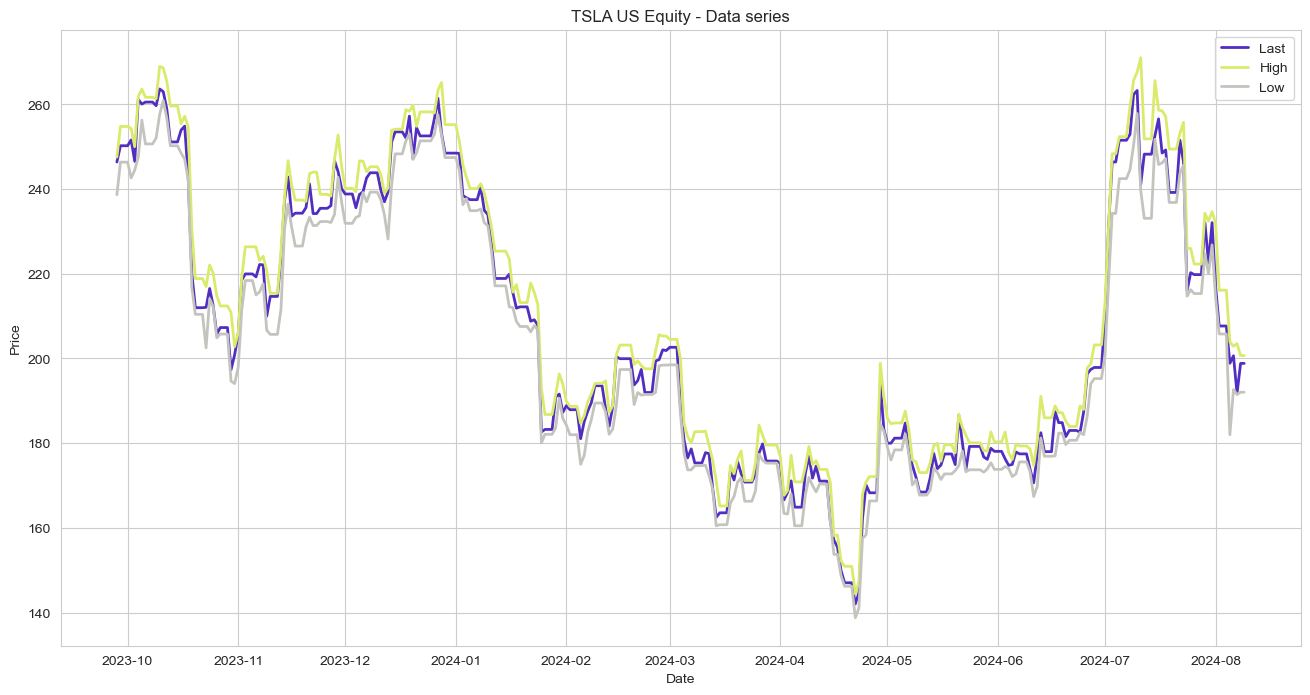

In [56]:
#Virtualization
 
color1 = "#522dc2"
color2 = "#daeb6c"
color3 = "#c4c4be"
 
dfname = tickers
 
#plotting last, high and low
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(df['PX_HIGH'][split_time:], lw=2, c=color2)
plt.plot(df['PX_LOW'][split_time:], lw=2, c=color3)
plt.legend(['Last','High', 'Low'])
 
plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()

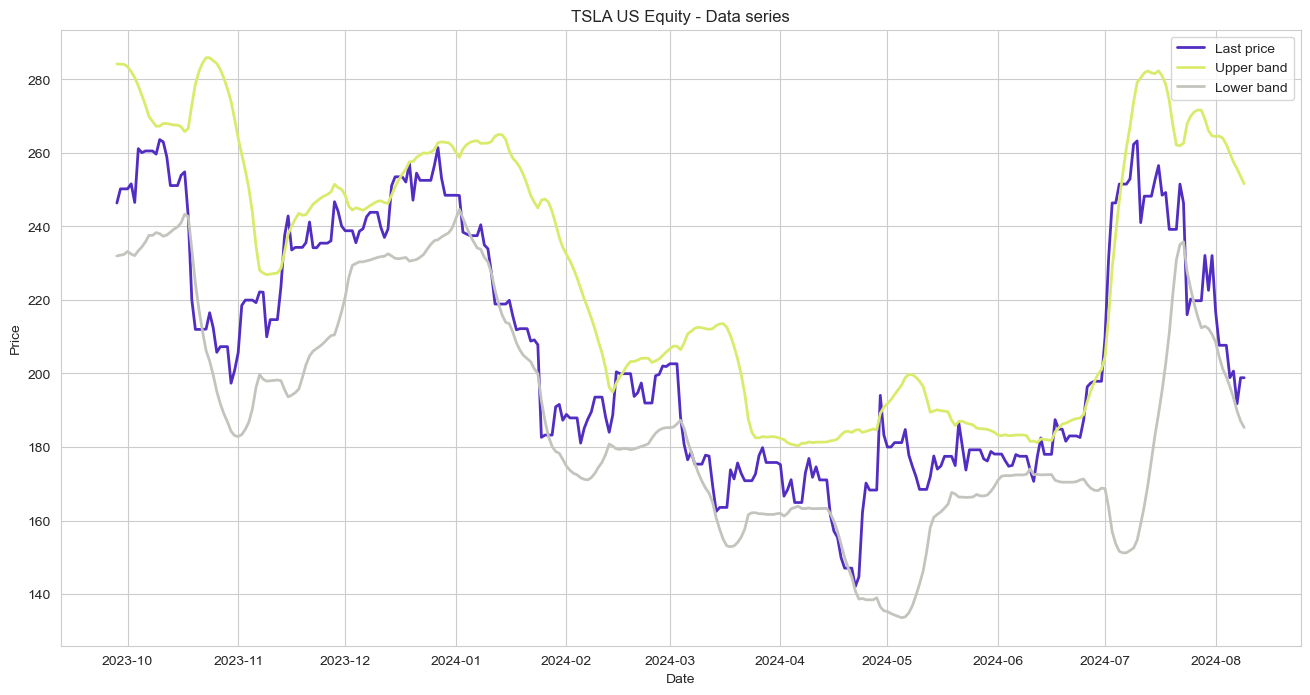

In [57]:
#plotting for last price, upper band and lower band
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(ti_df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(ti_df['upper_band'][split_time:], lw=2, c=color2)
plt.plot(ti_df['lower_band'][split_time:], lw=2, c=color3)
plt.legend(['Last price','Upper band', 'Lower band'])
plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()

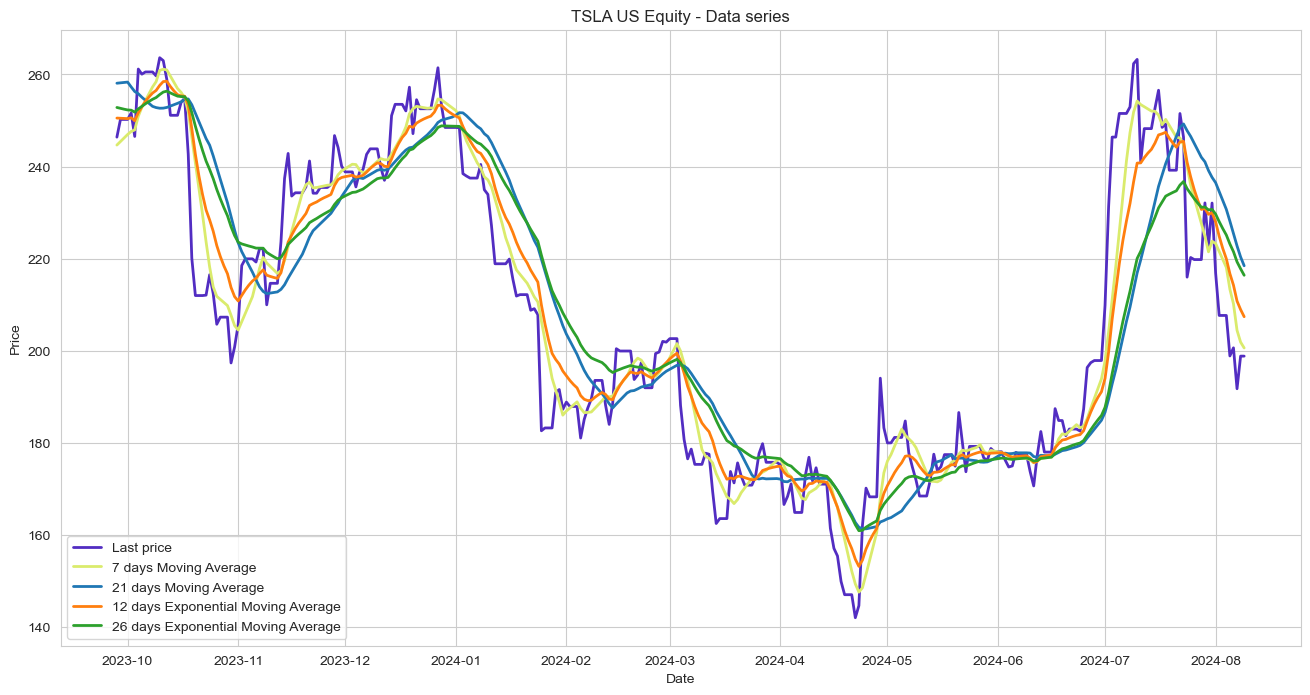

In [58]:
#plotting for Last price","7 days Moving Average","21 days Moving Average","12 days Exponential Moving Average", "26 days Exponential Moving Average
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(ti_df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(ti_df['ma7'][split_time:], lw=2, c=color2)
plt.plot(ti_df['ma21'][split_time:], lw=2)
plt.plot(ti_df['12ema'][split_time:], lw=2 )
plt.plot(ti_df['26ema'][split_time:], lw=2)
 
plt.legend(["Last price","7 days Moving Average","21 days Moving Average","12 days Exponential Moving Average", "26 days Exponential Moving Average"])
plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()

In [59]:
import shutil

# Remove old directory if it exists
shutil.rmtree('my_dir/lstm_tuning', ignore_errors=True)


In [61]:
#Hyperparameter optimisation
def build_lstm_model(hp):
    model = Sequential()
    # Tune the number of units in the first LSTM layer
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    # Tune the number of units in the second LSTM layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=512, step=32), return_sequences=True))
    model.add(Dropout(0.2))
    # Tune the number of units in the third LSTM layer
    model.add(LSTM(units=hp.Int('units_3', min_value=32, max_value=512, step=32)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mae')
    return model
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=5,  # The number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='my_dir',
    project_name='lstm_tuning'
)
 
# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
 
best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from my_dir\lstm_tuning\tuner0.json

Search: Running Trial #7

Value             |Best Value So Far |Hyperparameter
320               |224               |units_1
448               |480               |units_2
416               |352               |units_3

Epoch 1/100


C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.2122 - val_loss: 93.0183
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0639 - val_loss: 93.0294
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0603 - val_loss: 93.0273
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0596 - val_loss: 93.0294
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0617 - val_loss: 93.0302
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0607 - val_loss: 93.0297
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0572 - val_loss: 93.0258
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0600 - val_loss: 93.0288
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0597 - val_loss: 93.0278
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0577 - val_loss: 93.0284
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0578 - val_loss: 93.0300
Epoch 12/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 

Traceback (most recent call last):
  File "C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner_utils.py", line 76, in on_epoch_end
    self._save_model()
  File "C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner_utils.py", line 86, in _save_model
    self.model.save_weights(write_filepath)
  File "C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\h5py\_hl\files.py", line 562, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\h5py\_hl\files.py", line 241, in make_fid
    fid = h5f.create(name, h5f.ACC_TRUNC, fapl=fapl, fcpl=fcpl)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "h5py\\_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py\\_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py\\h5f.pyx", line 122, in h5py.h5f.create
PermissionError: [Errno 13] Unable to create file (unable to open file: name = 'my_dir\lstm_tuning\trial_06\checkpoint.weights.h5', errno = 13, error message = 'Permission denied', flags = 13, o_flags = 302)


In [62]:
import shutil

# Remove old directory for GRU tuning
shutil.rmtree('my_dir/gru_tuning', ignore_errors=True)


In [71]:
y_predicted_lstm = model_lstm.predict(X_test)
y_predicted_lstm = scaler.inverse_transform(y_predicted_lstm)
y_predicted_lstm = pd.DataFrame(y_predicted_lstm)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


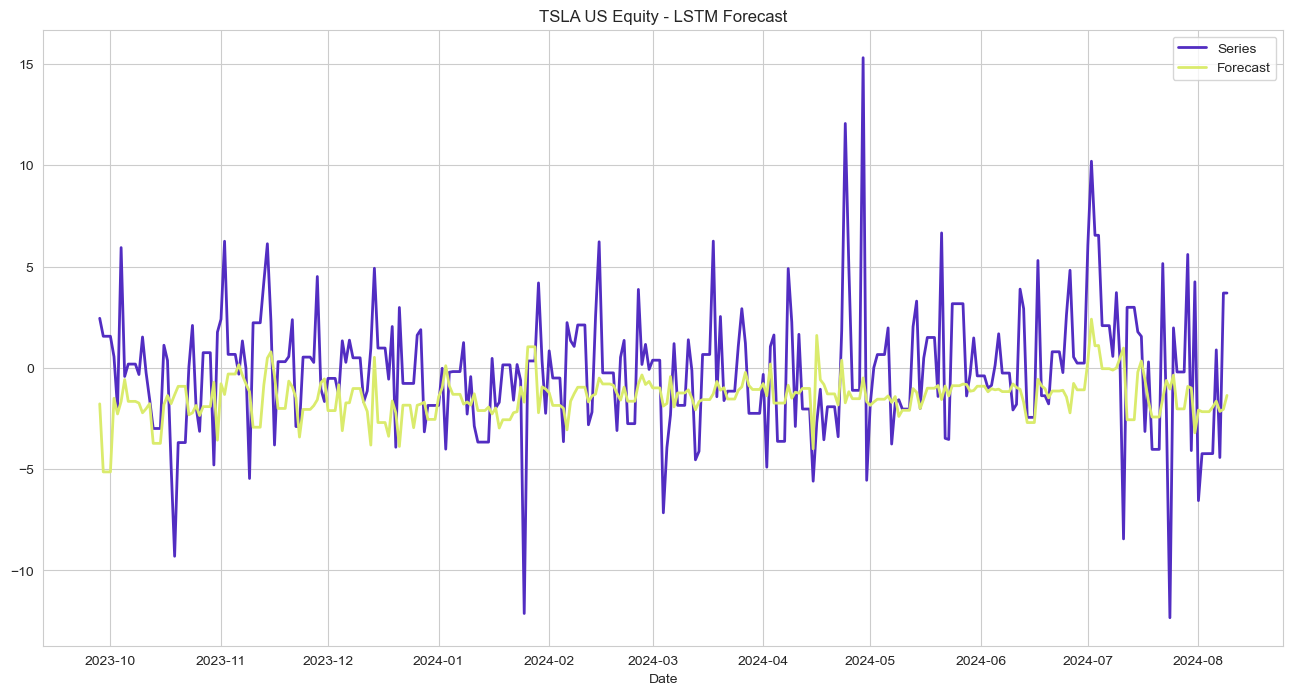

In [74]:
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.plot(df['CHG_PCT_1D'][split_time:], lw=2, c=color1)
plt.plot(df['CHG_PCT_1D'][split_time:].index, y_predicted_lstm, lw=2, c=color2)
plt.legend(['Series', 'Forecast'])
plt.title(dfname+' - LSTM Forecast')
plt.grid(True)
plt.show()

In [63]:
def build_gru_model(hp):
    model = Sequential()
    # Tune the number of units in the first GRU layer
    model.add(GRU(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    # Tune the number of units in the second GRU layer
    model.add(GRU(units=hp.Int('units_2', min_value=32, max_value=512, step=32), return_sequences=True))
    model.add(Dropout(0.2))
    # Tune the number of units in the third GRU layer
    model.add(GRU(units=hp.Int('units_3', min_value=32, max_value=512, step=32)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mae')
    return model

tuner = kt.RandomSearch(
    build_gru_model,
    objective='val_loss',
    max_trials=10,  # The number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='my_dir',
    project_name='gru_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 00m 45s]
val_loss: 93.01203918457031

Best val_loss So Far: 93.00897216796875
Total elapsed time: 00h 09m 03s


C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\bs231247\AppData\Local\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [68]:
y_predicted_gru = model_gru.predict(X_test)
y_predicted_gru = scaler.inverse_transform(y_predicted_gru)
y_predicted_gru = pd.DataFrame(y_predicted_gru)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


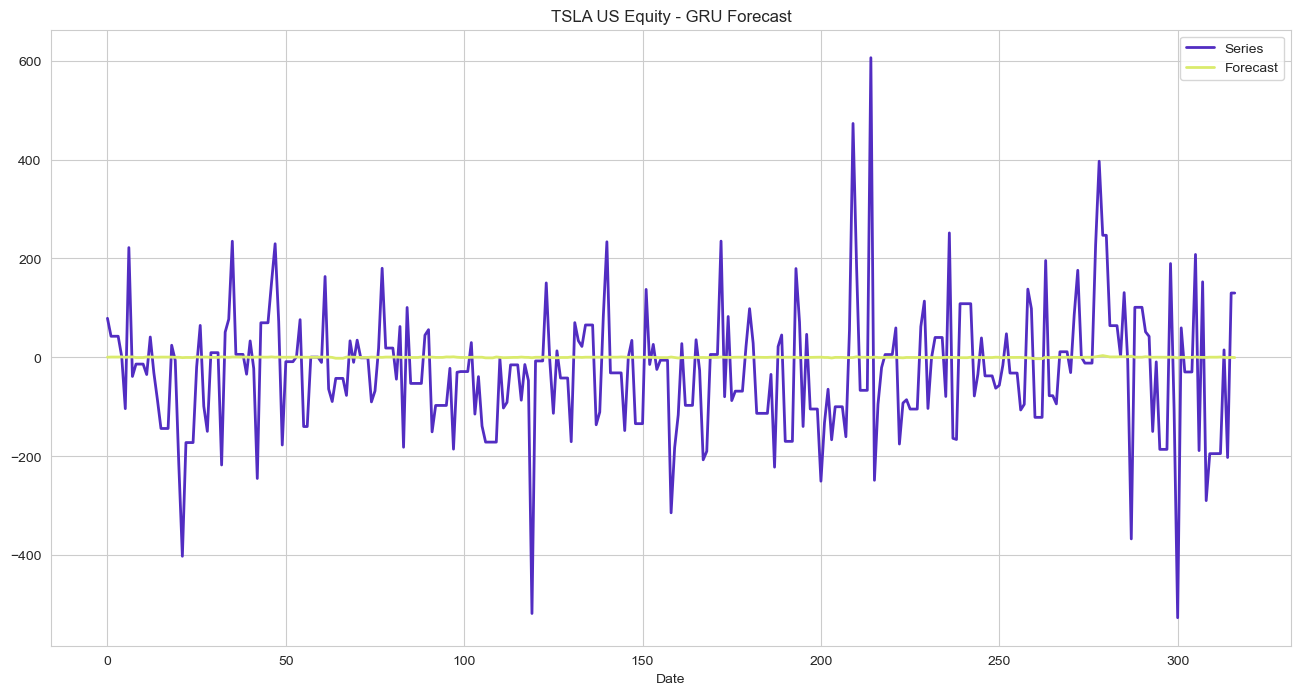

In [69]:
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.plot(y_test, lw=2, c=color1)
plt.plot(y_test.index, y_predicted_gru, lw=2, c=color2)
plt.legend(['Series', 'Forecast'])
plt.title(dfname+' - GRU Forecast')
plt.grid(True)
plt.show()

In [70]:
addMetrics(metricsDF, "GRU prediction",y_predicted_gru.values.reshape(-1))
metricsDF

NameError: name 'addMetrics' is not defined

In [64]:
# Regression MOdels

In [65]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 960.0 kB/s eta 0:00:04
     ----------------------------- ---------- 2.2/3.0 MB 27.6 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 31.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/73.5 kB ? eta -:--:--
   ---------------------------------------- 73.5/73.5 kB ? eta 0:00:00
   ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
   ---------------------------------------- 112.2/112.2 kB ? eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138

In [66]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.1/124.9 MB 525.1 kB/s eta 0:03:58
   ---------------------------------------- 0.1/124.9 MB 751.6 kB/s eta 0:02:47
    --------------------------------------- 2.3/124.9 MB 14.9 MB/s eta 0:00:09
   - -------------------------------------- 5.1/124.9 MB 25.2 MB/s eta 0:00:05
   -- ------------------------------------- 8.2/124.9 MB 32.8 MB/s eta 0:00:04
   --- ------------------------------------ 11.7/124.9 MB 65.6 MB/s eta 0:00:02
   ---- ----------------------------------- 14.7/124.9 MB 73.1 MB/s eta 0:00:02
   ----- ---------------------------------- 17.8/124.9 MB 65.2 MB/s eta 0:00:02
   ------ --------------------------------- 21.0/124.9 MB 72.6 MB/s eta 0:00:02
   ------- -------------------------------- 23.2/124.9 MB 65.6 MB/s eta 0:00:02
   -------- ------------------------------- 26.2/124

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

%matplotlib inline

# Import the models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [84]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2643, 1, 12)
(2643, 1)
(294, 1, 12)
(294, 1)


In [85]:
print(X_train)
print(y_train)

[[[ 1.52792547  1.33706283 -0.14756315 ... -1.33490469  1.48082688
    0.13689149]]

 [[12.07521354  3.9435517   3.30483804 ... -1.3103634   6.10127304
    0.94493252]]

 [[ 8.91233816  2.03468786  2.79164327 ... -1.30997811  2.96982767
    0.75040412]]

 ...

 [[-0.33374626 -0.33405965 -0.47414165 ...  1.25122793 -0.50922503
   -0.10252808]]

 [[-0.31408072 -0.35168082 -0.35750647 ...  1.25565039 -0.52387419
   -0.33197183]]

 [[-0.34030145 -0.34417016 -0.40416054 ...  1.21526196 -0.5290883
   -0.5065486 ]]]
[[0.49008472]
 [0.7792558 ]
 [0.57213177]
 ...
 [0.48802399]
 [0.50909018]
 [0.45860619]]


In [86]:
df

,CHG_PCT_1D,PX_LAST,PX_HIGH,PX_LOW,PX_VOLUME,TWITTER_NEG_SENTIMENT_COUNT,TWITTER_POS_SENTIMENT_COUNT,TWITTER_NEUTRAL_SENTIMENT_CNT,TWITTER_PUBLICATION_COUNT,NEWS_POS_SENTIMENT_COUNT,NEWS_NEG_SENTIMENT_COUNT,NEWS_NEUTRAL_SENTIMENT_COUNT,NEWS_PUBLICATION_COUNT
2016-07-26,-0.6883,22.198,22.496,22.140,224959288.0,944.0,575.0,6051.0,8482.0,14.0,68.0,296.0,2346.0
2016-07-27,6.4963,23.640,23.961,23.594,369379280.0,5913.0,3793.0,15074.0,27091.0,162.0,324.0,458.0,5131.0
2016-07-28,1.3502,23.959,23.984,23.610,159479356.0,1057.0,2828.0,8466.0,14479.0,140.0,163.0,419.0,4259.0
2016-07-29,-0.1246,23.929,24.007,23.807,110934752.0,451.0,591.0,6703.0,8809.0,45.0,57.0,379.0,2575.0
2016-07-30,-0.1246,23.929,24.007,23.807,110934752.0,451.0,591.0,6703.0,8809.0,45.0,57.0,379.0,2575.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,-4.8167,209.270,213.500,196.000,119548589.0,54.0,15.0,211.0,452.0,14.0,36.0,104.0,965.0
2024-08-06,-0.9748,207.230,209.990,201.070,69660488.0,93.0,15.0,323.0,585.0,10.0,152.0,281.0,1350.0
2024-08-07,1.2498,209.820,213.640,206.390,63516417.0,63.0,8.0,270.0,493.0,2.0,53.0,166.0,966.0
2024-08-08,1.6633,213.310,214.200,208.830,47161149.0,27.0,8.0,192.0,364.0,16.0,10.0,168.0,1068.0


In [87]:
# Create Dataframe for Adjusted Close prices

df_adj = df[['CHG_PCT_1D']]
df_adj 
#df_adj = df.copy()

,CHG_PCT_1D
2016-07-26,-0.6883
2016-07-27,6.4963
2016-07-28,1.3502
2016-07-29,-0.1246
2016-07-30,-0.1246
...,...
2024-08-05,-4.8167
2024-08-06,-0.9748
2024-08-07,1.2498
2024-08-08,1.6633


In [88]:
# A variable for predicting 'n' days into the future

forecast_out = 30

# Create column for target variable shifted 'n' days up
df_adj['Prediction'] = df_adj[['CHG_PCT_1D']].shift(-forecast_out)

df_adj

,CHG_PCT_1D,Prediction
2016-07-26,-0.6883,-0.4258
2016-07-27,6.4963,-0.5857
2016-07-28,1.3502,-0.5857
2016-07-29,-0.1246,-0.5857
2016-07-30,-0.1246,-0.1122
...,...,...
2024-08-05,-4.8167,NaN
2024-08-06,-0.9748,NaN
2024-08-07,1.2498,NaN
2024-08-08,1.6633,NaN


In [89]:
X = np.array(df_adj.drop(['Prediction'],axis = 1))
# Remove last 'n' rows
X = X[:-forecast_out]

print(X)

[[-0.6883]
 [ 6.4963]
 [ 1.3502]
 ...
 [ 0.6539]
 [ 0.3775]
 [ 1.8804]]


In [90]:
y = np.array(df_adj['Prediction'])
# Remove last 'n' rows
y = y[:-forecast_out]

print(y)

[-0.4258 -0.5857 -0.5857 ...  1.2498  1.6633  1.6633]


In [91]:
train_size = int(X.shape[0]*0.7)

X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

In [92]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2034, 1)
(2034,)
(873, 1)
(873,)


In [93]:
print(X_train)
print(y_train)

[[-0.6883]
 [ 6.4963]
 [ 1.3502]
 ...
 [-0.1389]
 [-2.1269]
 [-0.9356]]
[-0.4258 -0.5857 -0.5857 ...  2.0919  2.0919  2.0919]


In [94]:
X_forecast = np.array(df_adj.drop(['Prediction'],axis = 1))[-forecast_out:]
print(X_forecast)

[[-2.3221]
 [ 1.3051]
 [ 1.3051]
 [ 1.3051]
 [ 1.6743]
 [ 0.1792]
 [-2.5296]
 [-2.0535]
 [ 0.058 ]
 [ 0.058 ]
 [ 0.058 ]
 [-0.156 ]
 [ 0.4688]
 [-2.8754]
 [-0.4805]
 [ 0.2161]
 [ 0.2161]
 [ 0.2161]
 [ 0.1285]
 [ 0.2566]
 [ 1.4991]
 [-1.6751]
 [ 0.6869]
 [ 0.6869]
 [ 0.6869]
 [-4.8167]
 [-0.9748]
 [ 1.2498]
 [ 1.6633]
 [ 1.6633]]


In [95]:
models = {}

models["Linear"] = LinearRegression()
models["Lasso"] = Lasso()
models["Ridge"] = Ridge()
models["ElasticNet"] = ElasticNet()
models["KNN"] = KNeighborsRegressor()
models["DecisionTree"] = DecisionTreeRegressor()
models["SVR"] = SVR(kernel='rbf', C=1e3, gamma='scale')
models["AdaBoost"] = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"] = RandomForestRegressor()
models["ExtraTrees"]= ExtraTreesRegressor()
models["BaggingRegressor"] = BaggingRegressor()
models["XGBRegressor"] = XGBRegressor(objective ='reg:squarederror')
models["MLPRegressor"] = MLPRegressor(solver = 'lbfgs')
     

In [96]:
model_results = []  
model_names   = []
for model_name in models:
    model = models[model_name]
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=7)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    model_results.append(cv_results)
    model_names.append(model_name)
    print("{}: {}, ({})".format(model_name, round(cv_results.mean(), 6), round(cv_results.std(), 6)))
     

Linear: -0.006245, (0.006988)
Lasso: -0.004885, (0.006094)
Ridge: -0.006243, (0.006987)
ElasticNet: -0.004885, (0.006094)
KNN: -0.160215, (0.073623)
DecisionTree: -0.633786, (0.357935)
SVR: -0.561677, (1.092907)
AdaBoost: -0.04976, (0.036617)
GradientBoost: -0.072328, (0.036062)
RandomForest: -0.325897, (0.168862)
ExtraTrees: -0.427559, (0.237392)
BaggingRegressor: -0.372954, (0.226698)
XGBRegressor: -0.207389, (0.126676)
MLPRegressor: -0.046783, (0.053695)


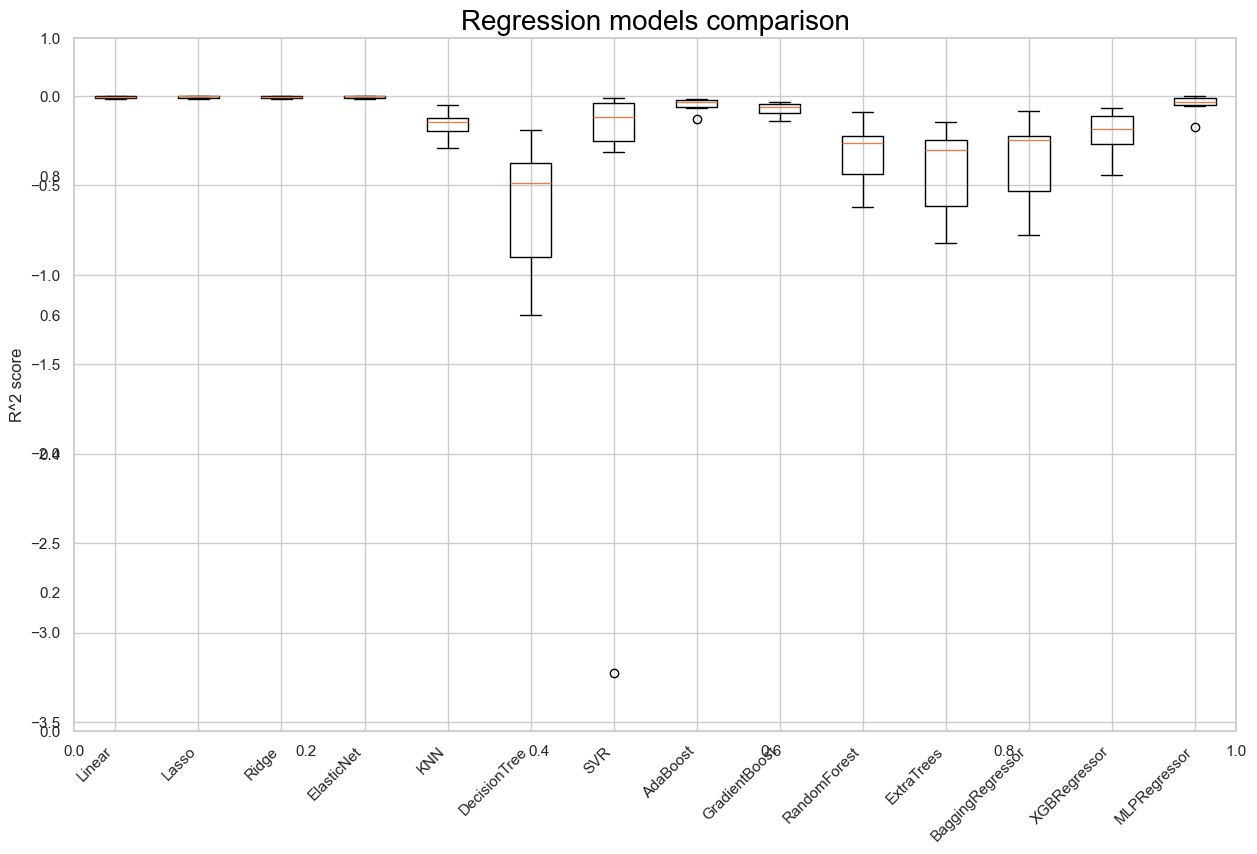

In [97]:
# Compare algorithms  

def box_compare():
  sns.set(rc={'figure.figsize':(15, 9)})
  sns.set_style(style='whitegrid', )
  figure = plt.figure()
  plt.title('Regression models comparison', color = 'black', fontsize = 20)
  axis = figure.add_subplot(111)
  plt.boxplot(model_results)
  axis.set_xticklabels(model_names, rotation = 45, ha="right")
  axis.set_ylabel("R^2 score")
  plt.margins(0.05, 0.1)

box_compare()
     

In [98]:
# Create Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)# Create Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

LinearRegression()

In [99]:

# Make predictions using the model
predictions = lr.predict(X_test)

In [100]:

# The coefficients
print('Coefficients: ', lr.coef_)
# The mean squared error
print('RMSE: {}'.format(round(mean_squared_error(y_test, predictions, squared=False), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('R^2 score: {}'.format(round(r2_score(y_test, predictions), 3)))

Coefficients:  [0.04216802]
RMSE: 1.789
R^2 score: -0.01


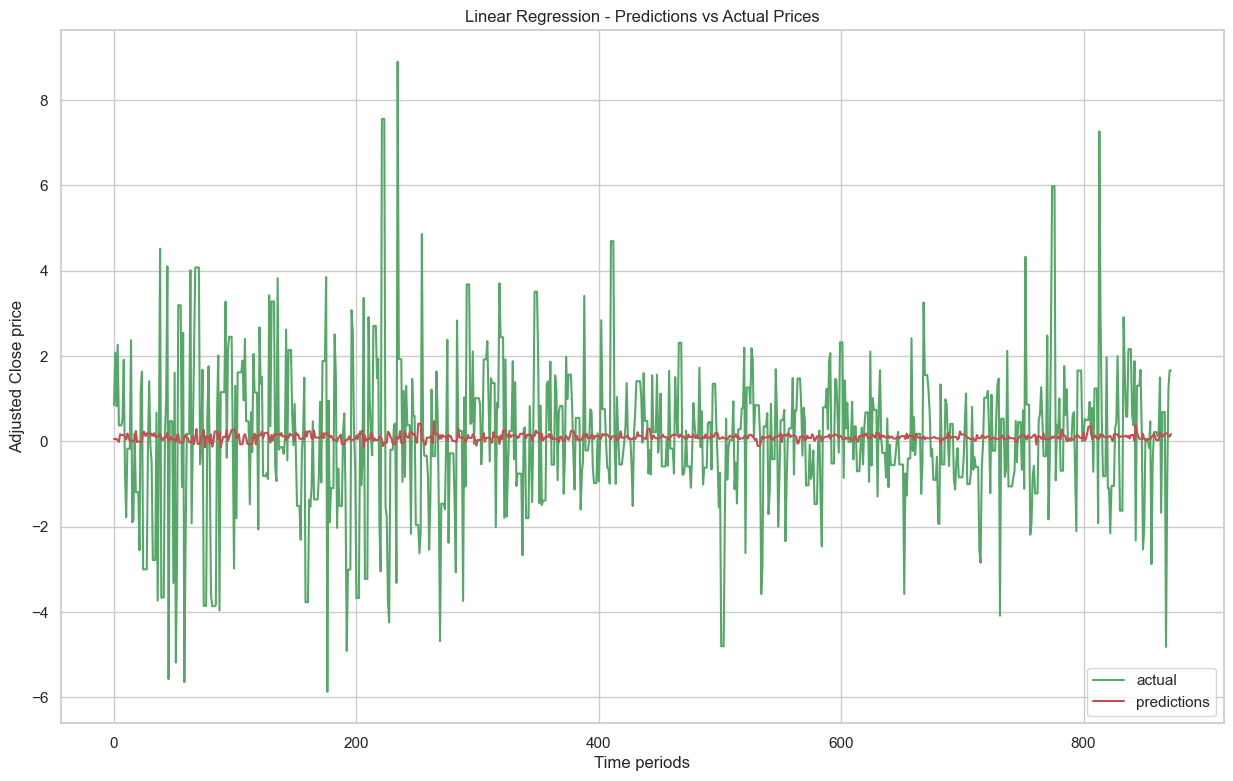

In [101]:
# Plot predictions against actual Adjusted Close prices 

x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, y_test, color='g', label="actual")
plt.plot(x_axis, predictions, color='r', label="predictions")
plt.xlabel('Time periods')
plt.ylabel('Adjusted Close price')
plt.title('Linear Regression - Predictions vs Actual Prices')
plt.legend(loc='lower right')
plt.show()

In [102]:
pd.DataFrame({"Actual": y_test, "Predict": predictions}).head()


,Actual,Predict
0,0.8538,0.056210
1,2.0801,0.056210
2,0.8234,0.056210
3,2.2678,0.020553
4,0.3734,-0.013401


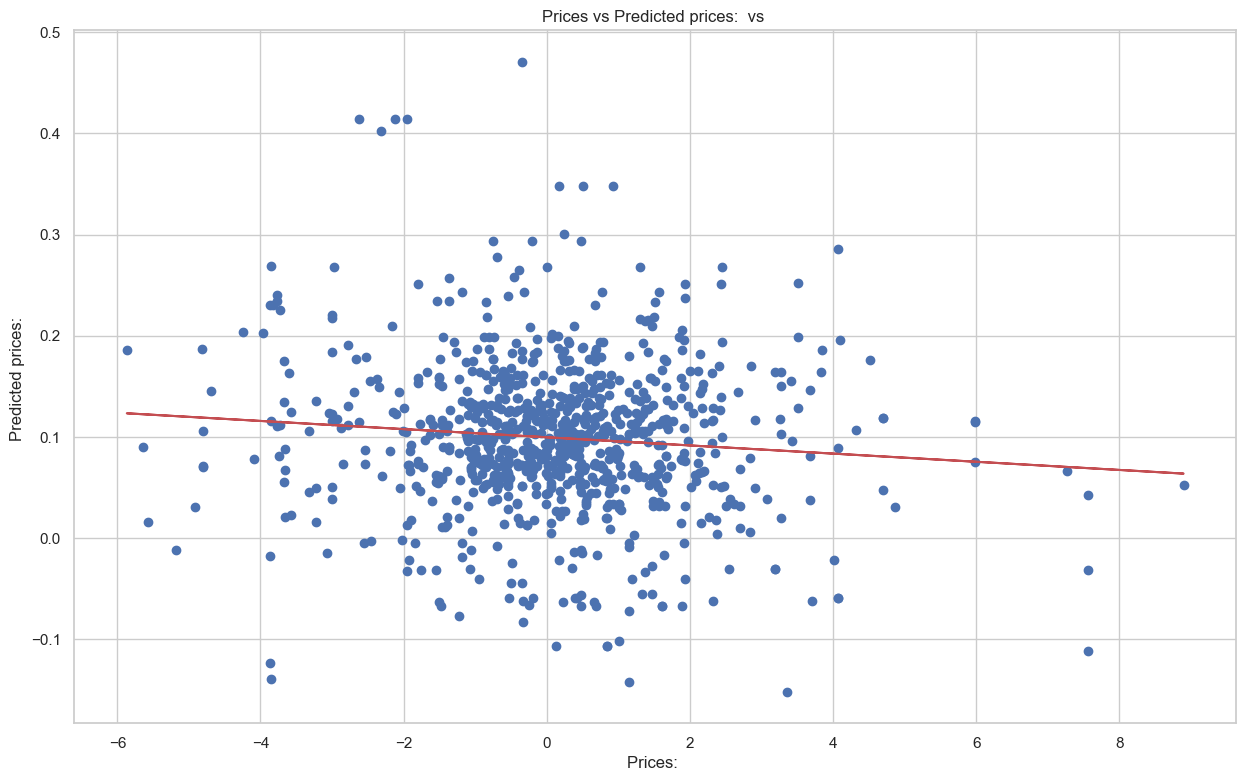

In [103]:
# create basic scatterplot
plt.scatter(y_test,predictions)

# obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test, predictions, 1)

# add linear regression line to scatterplot 
plt.plot(y_test, m*y_test+b, c='r')

plt.xlabel("Prices: ")
plt.ylabel("Predicted prices: ")
plt.title("Prices vs Predicted prices:  vs ")
plt.show()
     

In [104]:
# Prediction for next 30ndays

In [105]:
# Predicted prices

lr_prediction = lr.predict(X_forecast)
print(lr_prediction)

[-0.00225559  0.15069627  0.15069627  0.15069627  0.1662647   0.10321929
 -0.01100546  0.00907074  0.09810853  0.09810853  0.09810853  0.08908457
  0.11543115 -0.02558716  0.07540104  0.10477529  0.10477529  0.10477529
  0.10108137  0.10648309  0.15887687  0.02502712  0.124628    0.124628
  0.124628   -0.10744795  0.05455739  0.14836438  0.16580086  0.16580086]


In [106]:
# Actual prices

X_forecast

array([[-2.3221],
       [ 1.3051],
       [ 1.3051],
       [ 1.3051],
       [ 1.6743],
       [ 0.1792],
       [-2.5296],
       [-2.0535],
       [ 0.058 ],
       [ 0.058 ],
       [ 0.058 ],
       [-0.156 ],
       [ 0.4688],
       [-2.8754],
       [-0.4805],
       [ 0.2161],
       [ 0.2161],
       [ 0.2161],
       [ 0.1285],
       [ 0.2566],
       [ 1.4991],
       [-1.6751],
       [ 0.6869],
       [ 0.6869],
       [ 0.6869],
       [-4.8167],
       [-0.9748],
       [ 1.2498],
       [ 1.6633],
       [ 1.6633]])

In [107]:

# The coefficients
print('Coefficients: ', lr.coef_)
# The mean squared error
print('RMSE: {}'.format(round(mean_squared_error(X_forecast, lr_prediction, squared=False), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('R^2 score: {}'.format(round(r2_score(X_forecast, lr_prediction), 3)))

Coefficients:  [0.04216802]
RMSE: 1.478
R^2 score: 0.07


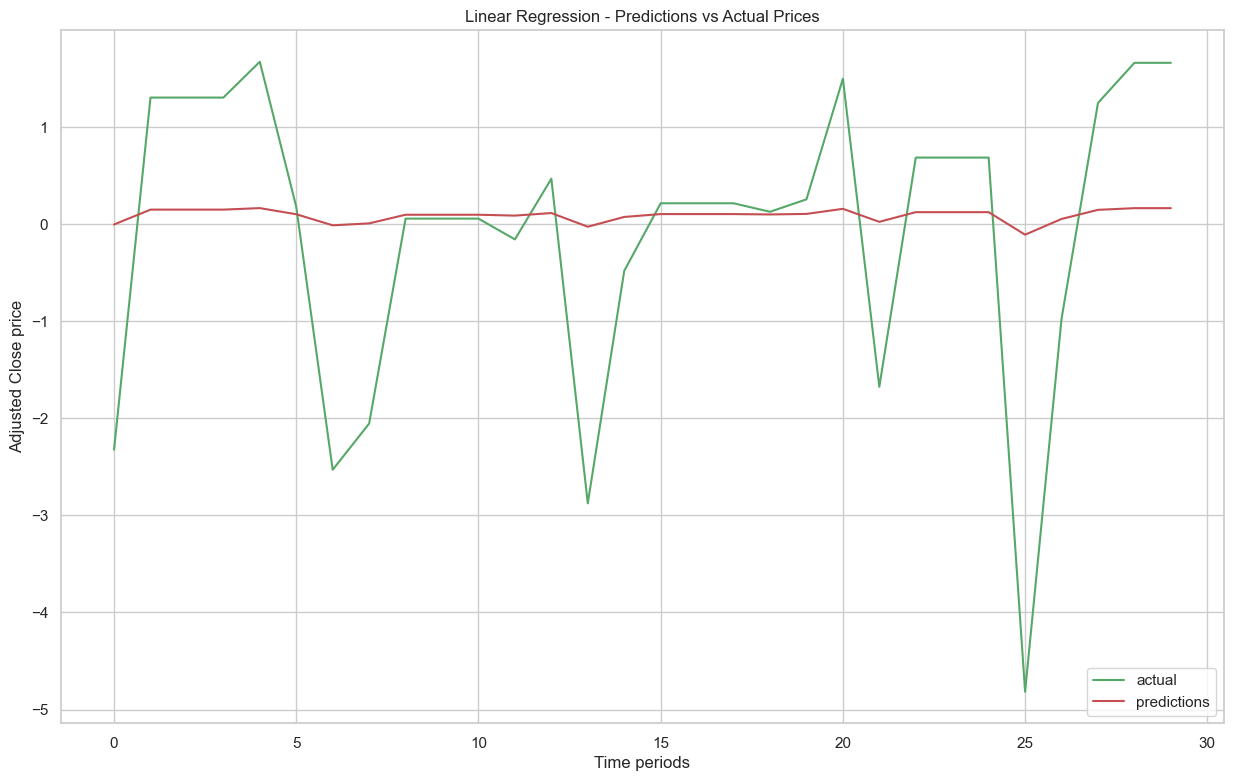

In [108]:
# Plot predictions against actual Adjusted Close prices 

x_axis = np.array(range(0, lr_prediction.shape[0]))
plt.plot(x_axis, X_forecast, color='g', label="actual")
plt.plot(x_axis, lr_prediction, color='r', label="predictions")
plt.xlabel('Time periods')
plt.ylabel('Adjusted Close price')
plt.title('Linear Regression - Predictions vs Actual Prices')
plt.legend(loc='lower right')
plt.show()

In [109]:
# Reshape data to be 1D
X_forecast = X_forecast.reshape(-1)
X_forecast 

array([-2.3221,  1.3051,  1.3051,  1.3051,  1.6743,  0.1792, -2.5296,
       -2.0535,  0.058 ,  0.058 ,  0.058 , -0.156 ,  0.4688, -2.8754,
       -0.4805,  0.2161,  0.2161,  0.2161,  0.1285,  0.2566,  1.4991,
       -1.6751,  0.6869,  0.6869,  0.6869, -4.8167, -0.9748,  1.2498,
        1.6633,  1.6633])

In [110]:
pd.DataFrame({"Actual": X_forecast, "Predict": lr_prediction}).head()


,Actual,Predict
0,-2.3221,-0.002256
1,1.3051,0.150696
2,1.3051,0.150696
3,1.3051,0.150696
4,1.6743,0.166265


In [111]:
# Hyper parameter optimisation

In [112]:
# Create dictionary of parameters
parameters = { 'fit_intercept': [True, False],
         'n_jobs': [None, -1]}

In [113]:
# Grid search to find best parameters
gridsearchcv_lr = GridSearchCV(estimator=lr, param_grid=parameters, cv=tscv, scoring='r2')
grid_result_lr = gridsearchcv_lr.fit(X_train, y_train)
print("Best: {} using {}".format(grid_result_lr.best_score_, grid_result_lr.best_params_))

Best: -0.0062450209957534775 using {'fit_intercept': True, 'n_jobs': None}


In [114]:
# All of the best parameters for the optimal model

best_model_lr = grid_result_lr.best_estimator_
print(f"Best model has the following hyperparameters: {best_model_lr}")

Best model has the following hyperparameters: LinearRegression()


In [115]:
# Reshape data to be 2D
X_forecast = X_forecast.reshape(-1,1)
X_forecast

array([[-2.3221],
       [ 1.3051],
       [ 1.3051],
       [ 1.3051],
       [ 1.6743],
       [ 0.1792],
       [-2.5296],
       [-2.0535],
       [ 0.058 ],
       [ 0.058 ],
       [ 0.058 ],
       [-0.156 ],
       [ 0.4688],
       [-2.8754],
       [-0.4805],
       [ 0.2161],
       [ 0.2161],
       [ 0.2161],
       [ 0.1285],
       [ 0.2566],
       [ 1.4991],
       [-1.6751],
       [ 0.6869],
       [ 0.6869],
       [ 0.6869],
       [-4.8167],
       [-0.9748],
       [ 1.2498],
       [ 1.6633],
       [ 1.6633]])

In [116]:
# Create Linear Regression model
lr = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None)

# Train the model using the training sets
lr.fit(X_train, y_train)

# Make predictions using the model
predictions = lr.predict(X_forecast)


# The coefficients
print('Coefficients: ', lr.coef_)
# The mean squared error
print('RMSE: {}'.format(round(mean_squared_error(X_forecast, predictions, squared=False), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('R^2 score: {}'.format(round(r2_score(X_forecast, predictions), 3)))

Coefficients:  [0.04518681]
RMSE: 1.465
R^2 score: 0.086


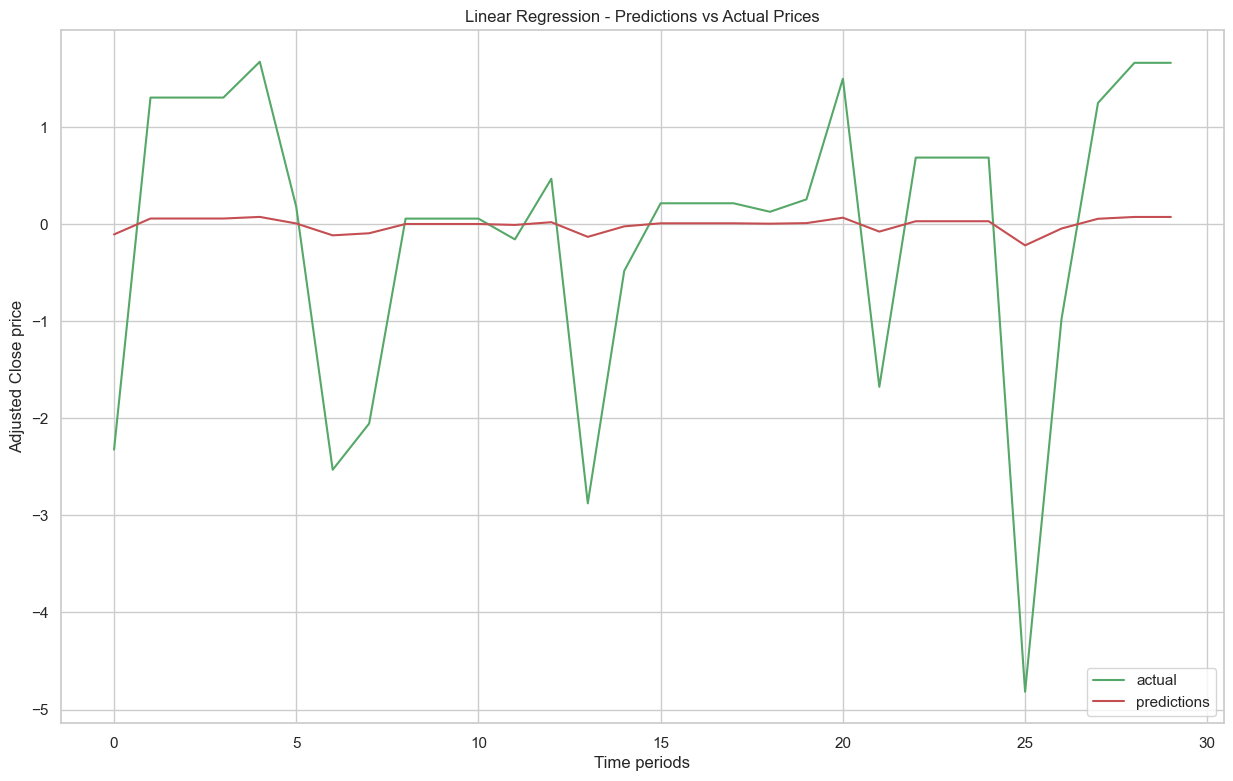

In [117]:
# Plot predictions against actual Adjusted Close prices  

x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, X_forecast, color='g', label="actual")
plt.plot(x_axis, predictions, color='r', label="predictions")
plt.xlabel('Time periods')
plt.ylabel('Adjusted Close price')
plt.title('Linear Regression - Predictions vs Actual Prices')
plt.legend(loc='lower right')
plt.show()

In [118]:
# MLP regressor

In [119]:

# Create an MLP Regressor model  
mlpr = MLPRegressor(max_iter=500, solver = 'lbfgs')

# Train the model using the training sets
mlpr.fit(X_train, y_train)
mlpr

MLPRegressor(max_iter=500, solver='lbfgs')

In [120]:

# Make predictions using the model
predictions = mlpr.predict(X_test)

In [121]:
# The mean squared error
print('RMSE: {}'.format(round(mean_squared_error(y_test, predictions, squared=False), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('R^2 score: {}'.format(round(r2_score(y_test, predictions), 3)))

RMSE: 1.792
R^2 score: -0.013


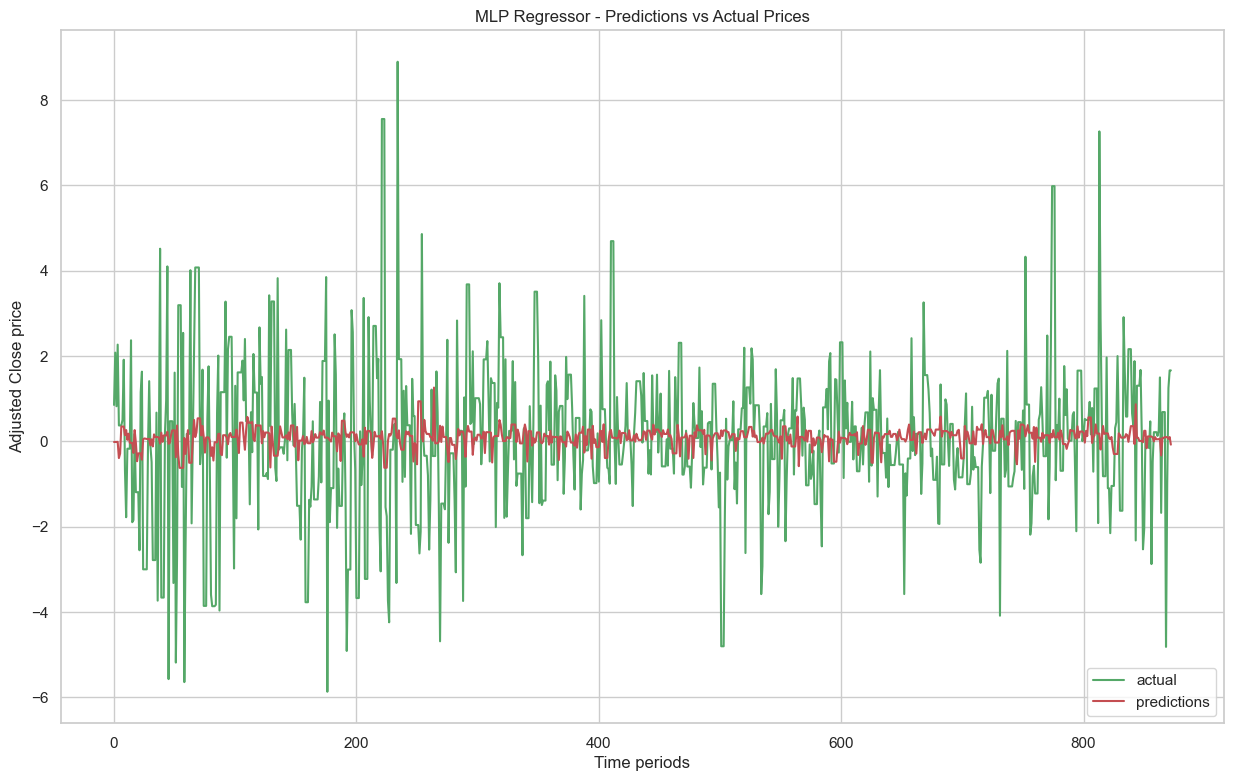

In [122]:
# Plot predictions against actual Adjusted Close prices 

x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, y_test, color='g', label="actual")
plt.plot(x_axis, predictions, color='r', label="predictions")
plt.xlabel('Time periods')
plt.ylabel('Adjusted Close price')
plt.title('MLP Regressor - Predictions vs Actual Prices')
plt.legend(loc='lower right')
plt.show()

In [123]:
pd.DataFrame({"Actual": y_test, "Predict": predictions}).head()

,Actual,Predict
0,0.8538,-0.014016
1,2.0801,-0.014016
2,0.8234,-0.014016
3,2.2678,-0.011009
4,0.3734,-0.391077


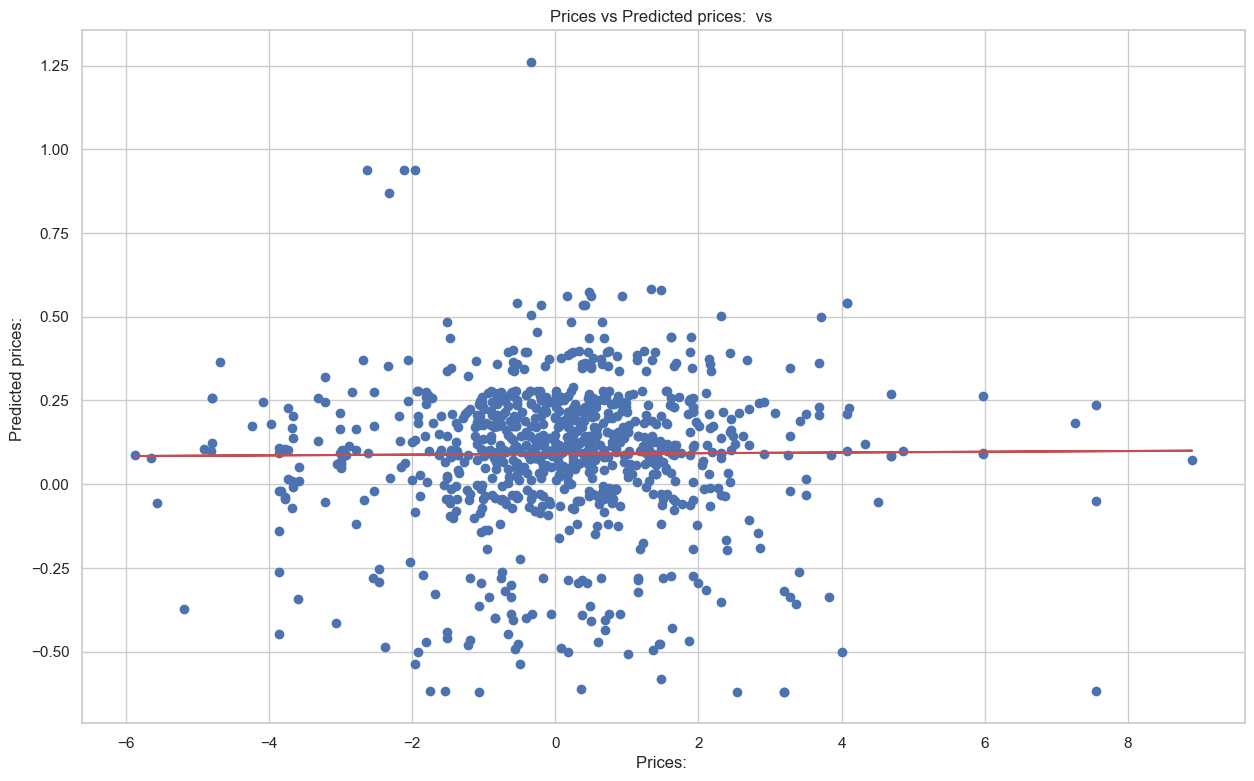

In [124]:
# create basic scatterplot
plt.scatter(y_test,predictions)

# obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test, predictions, 1)

# add linear regression line to scatterplot 
plt.plot(y_test, m*y_test+b, c='r')

plt.xlabel("Prices: ")
plt.ylabel("Predicted prices: ")
plt.title("Prices vs Predicted prices:  vs ")
plt.show()

In [125]:
# Predicted prices

mlpr_prediction = mlpr.predict(X_forecast)
print(mlpr_prediction)

[-0.24280289  0.34640463  0.34640463  0.34640463 -0.27970851  0.14306566
 -0.35921167 -0.11930292  0.1754127   0.1754127   0.1754127   0.11467834
  0.09257856 -0.5532076   0.26228011  0.13321743  0.13321743  0.13321743
  0.15659697  0.12240839 -0.45304712  0.03040458  0.04998298  0.04998298
  0.04998298 -0.02026647  0.02104391  0.35561737 -0.29059164 -0.29059164]


In [126]:
print(X_forecast)

[[-2.3221]
 [ 1.3051]
 [ 1.3051]
 [ 1.3051]
 [ 1.6743]
 [ 0.1792]
 [-2.5296]
 [-2.0535]
 [ 0.058 ]
 [ 0.058 ]
 [ 0.058 ]
 [-0.156 ]
 [ 0.4688]
 [-2.8754]
 [-0.4805]
 [ 0.2161]
 [ 0.2161]
 [ 0.2161]
 [ 0.1285]
 [ 0.2566]
 [ 1.4991]
 [-1.6751]
 [ 0.6869]
 [ 0.6869]
 [ 0.6869]
 [-4.8167]
 [-0.9748]
 [ 1.2498]
 [ 1.6633]
 [ 1.6633]]


In [127]:
# The mean squared error
print('RMSE: {}'.format(round(mean_squared_error(X_forecast, mlpr_prediction, squared=False), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('R^2 score: {}'.format(round(r2_score(X_forecast, mlpr_prediction), 3)))

RMSE: 1.483
R^2 score: 0.064


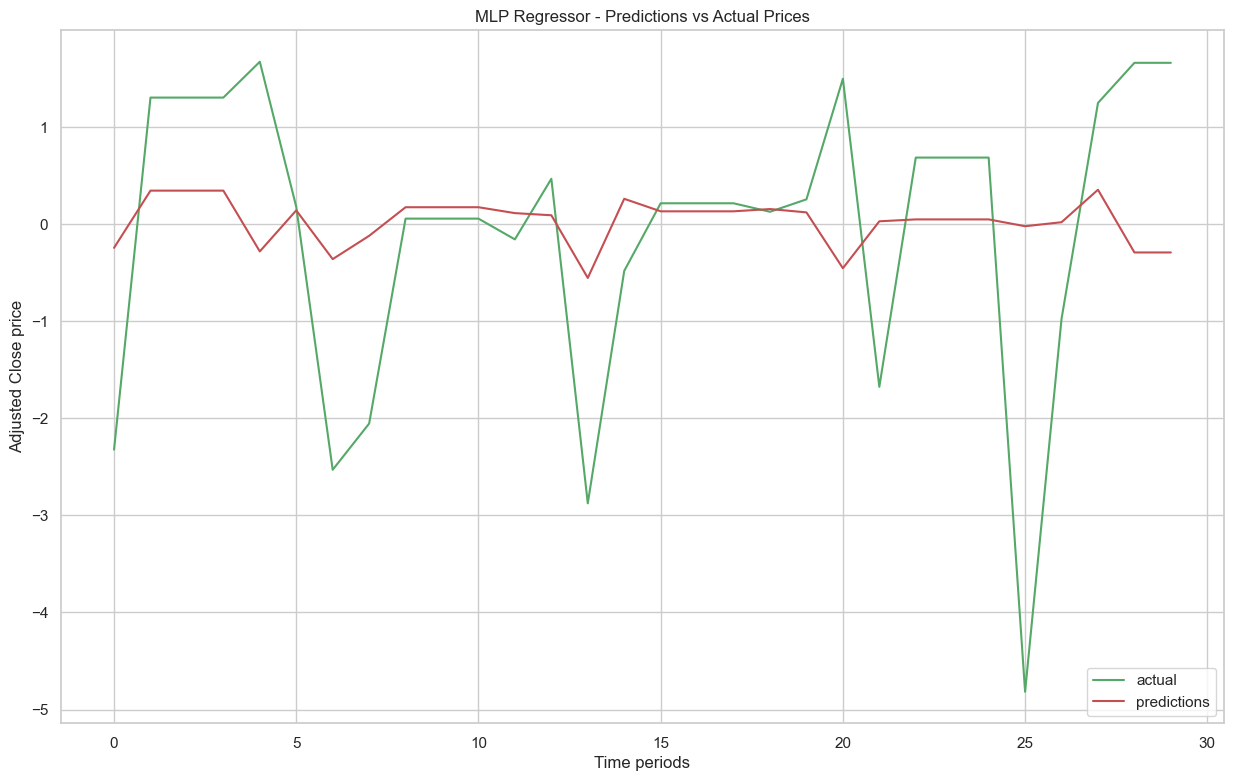

In [128]:
# Plot predictions against actual Adjusted Close prices 

x_axis = np.array(range(0, mlpr_prediction.shape[0]))
plt.plot(x_axis, X_forecast, color='g', label="actual")
plt.plot(x_axis, mlpr_prediction, color='r', label="predictions")
plt.xlabel('Time periods')
plt.ylabel('Adjusted Close price')
plt.title('MLP Regressor - Predictions vs Actual Prices')
plt.legend(loc='lower right')
plt.show()

In [129]:
# Reshape data to be 1D
X_forecast = X_forecast.reshape(-1)

In [130]:
pd.DataFrame({"Actual": X_forecast, "Predict": mlpr_prediction}).head()

,Actual,Predict
0,-2.3221,-0.242803
1,1.3051,0.346405
2,1.3051,0.346405
3,1.3051,0.346405
4,1.6743,-0.279709


In [131]:
# Reshape data as this needs to be 2D
y_train = y_train.reshape(-1, 1)

In [132]:
# Normalise data to improve convergence

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_norm = scaler.fit_transform(X_train)
y_train_norm = scaler.transform(y_train)
X_test_norm = scaler.transform(X_test)

In [133]:
# Create model

mlpr = MLPRegressor(max_iter=500)

In [134]:
# Create dictionary of parameters to iterate over

parameters = {"hidden_layer_sizes": [(50,50,50), (50,100,50), (100,)],
              "activation": ["identity", "logistic", "tanh", "relu"], 
              "solver": ["lbfgs", "sgd", "adam"], 
              "alpha": [0.0001, 0.05], 
              "learning_rate": ['constant','adaptive']}

In [135]:
# Grid search to find best parameters

gridsearchcv_mlpr = GridSearchCV(estimator=mlpr, param_grid=parameters, cv=tscv, scoring='r2')
grid_result_mlpr = gridsearchcv_mlpr.fit(X_train_norm, y_train_norm)
print("Best: {} using {}".format(grid_result_mlpr.best_score_, grid_result_mlpr.best_params_))

Best: -0.003919420120981422 using {'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'lbfgs'}


In [136]:
# All of the best parameters for the optimal model  

best_model_mlpr = grid_result_mlpr.best_estimator_
print(f"Best model has the following hyperparameters: {best_model_mlpr}")

Best model has the following hyperparameters: MLPRegressor(activation='logistic', alpha=0.05, max_iter=500, solver='lbfgs')


In [137]:
# Reshape data to be 2D
X_forecast = X_forecast.reshape(-1,1)
X_forecast

array([[-2.3221],
       [ 1.3051],
       [ 1.3051],
       [ 1.3051],
       [ 1.6743],
       [ 0.1792],
       [-2.5296],
       [-2.0535],
       [ 0.058 ],
       [ 0.058 ],
       [ 0.058 ],
       [-0.156 ],
       [ 0.4688],
       [-2.8754],
       [-0.4805],
       [ 0.2161],
       [ 0.2161],
       [ 0.2161],
       [ 0.1285],
       [ 0.2566],
       [ 1.4991],
       [-1.6751],
       [ 0.6869],
       [ 0.6869],
       [ 0.6869],
       [-4.8167],
       [-0.9748],
       [ 1.2498],
       [ 1.6633],
       [ 1.6633]])

In [138]:
# Create MLP Regression model  
mlpr = MLPRegressor(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

# Train the model using the training sets
mlpr.fit(X_train, y_train)

# Make predictions using the model
predictions = mlpr.predict(X_forecast)

# The mean squared error
print('RMSE: {}'.format(round(mean_squared_error(X_forecast, predictions, squared=False), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('R^2 score: {}'.format(round(r2_score(X_forecast, predictions), 3)))
     

RMSE: 1.502
R^2 score: 0.04


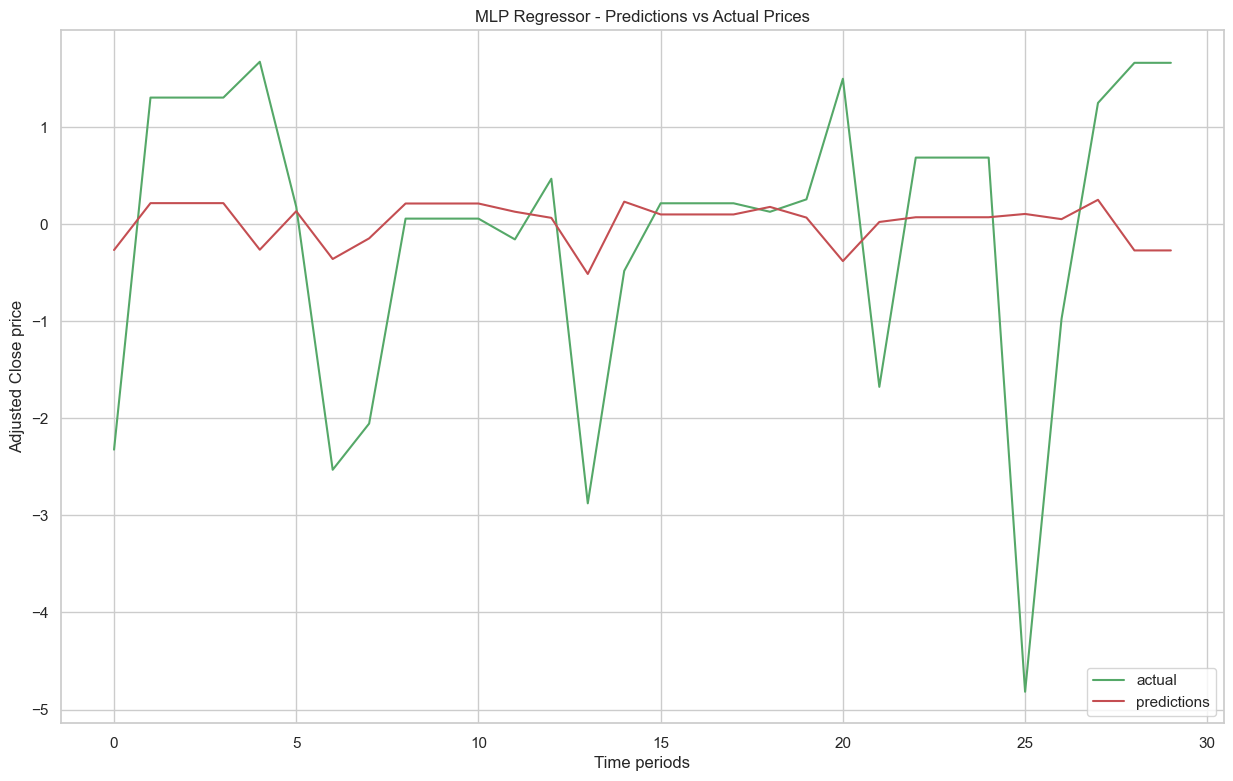

In [139]:
# Plot predictions against actual Adjusted Close prices

x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, X_forecast, color='g', label="actual")
plt.plot(x_axis, predictions, color='r', label="predictions")
plt.xlabel('Time periods')
plt.ylabel('Adjusted Close price')
plt.title('MLP Regressor - Predictions vs Actual Prices')
plt.legend(loc='lower right')
plt.show()
     